In [ ]:
# 
# The Bank Marketing dataset available from OA 8.8 is related to direct 
# marketing campaigns (phone calls) of a Portuguese banking institution. 
# The classification goal is to predict if the client will subscribe (yes/no) 
# a term deposit (variable y). There are 17 features.  Apply LDA to this 
# dataset and visualize the first two major elements. 
# 

In [17]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

# The bank dataset was not found in the datasets provided by the books website.
# So, I found a comparable dataset from Kaggle, with this context:
# 
#     Find the best strategies to improve for the next marketing 
#     campaign. How can the financial institution have a greater 
#     effectiveness for future marketing campaigns? In order to 
#     answer this, we have to analyze the last marketing campaign 
#     the bank performed and identify the patterns that will help 
#     us find conclusions in order to develop future strategies.
# 

df = pd.read_csv('../Datasets/Code_and_Data_(Chapter_08)/Code and Data (Chapter 08)/bank.csv')
encoder = LabelEncoder()

# Isolate feature set and target variable
X = df.drop(columns="deposit")

# X has many string columns which we need to encode to numeric values
string_columns = X[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']]
for col in string_columns:
    string_columns.loc[:, col] = encoder.fit_transform(string_columns[col])
X = pd.concat([X.drop(columns=string_columns.columns), string_columns], axis=1)

# Encode y
y = df.deposit
y = encoder.fit_transform(y)

# Inspect shape of X to see it currently has 16 features
print(f"\nShape of X: {X.shape} \n")


Shape of X: (11162, 16) 




Shape of X: (11162, 1) 



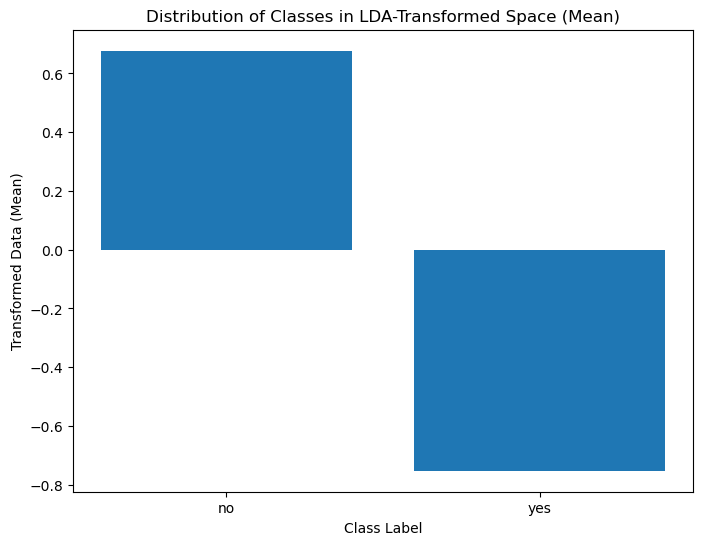

In [20]:
lda = LinearDiscriminantAnalysis()
X_r2 = lda.fit(X, y).transform(X)

# Inspect reduced shape of X to see it now has 16 features
print(f"\nShape of X: {X_r2.shape} \n")

# Configure plot
class_groups = pd.DataFrame({'transformed_data': X_r2.squeeze(), 'class': y})  
grouped_data = class_groups.groupby('class')['transformed_data'].mean()  

# Prepare data for bar chart
class_labels = encoder.classes_
class_means = grouped_data.values

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_means)
plt.xlabel("Class Label")
plt.ylabel("Transformed Data (Mean)") 
plt.title("Distribution of Classes in LDA-Transformed Space (Mean)")  
plt.show()